In [1]:
import pandas as pd

# Load train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Quick overview
print(train.head())
print(train.info())
print(train.describe())

print(test.head())
print(test.info())


   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [3]:
print(train.shape, test.shape)
#arrival delat in minutes has some missing values both in train and test data 

(103904, 25) (25976, 25)


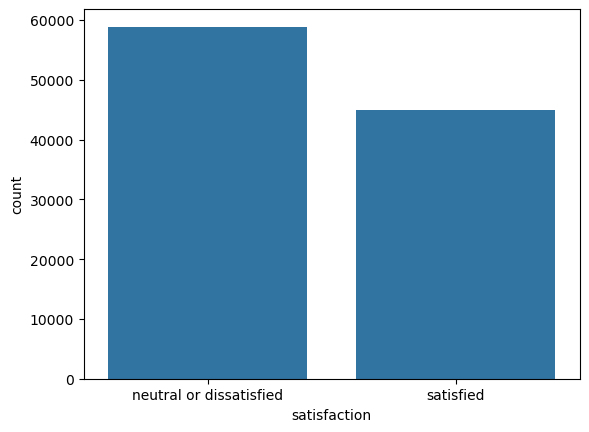

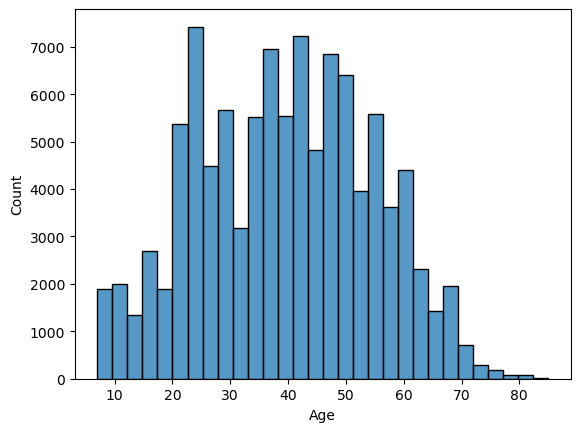

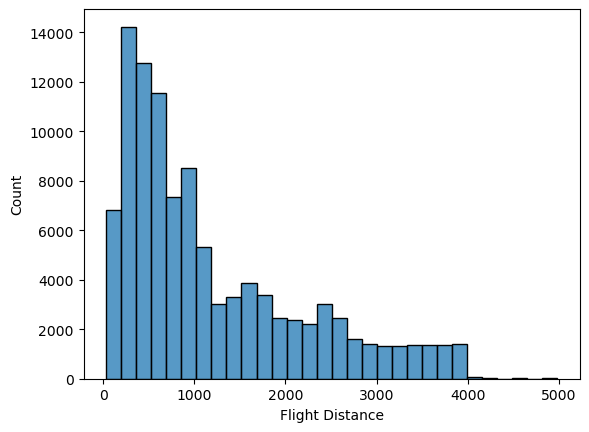

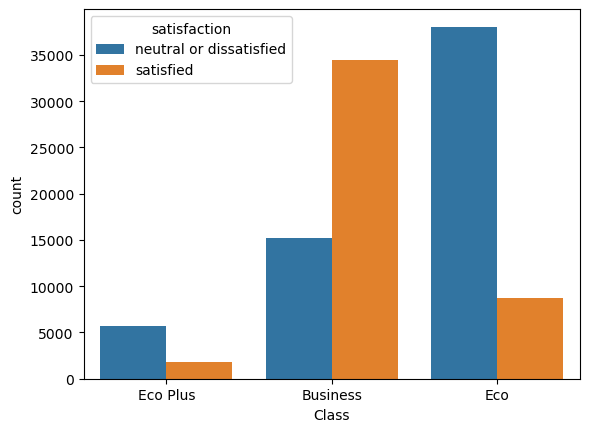

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Satisfaction distribution
sns.countplot(x='satisfaction', data=train)
plt.show()

# Age distribution
sns.histplot(train['Age'], bins=30)
plt.show()

# Flight Distance distribution
sns.histplot(train['Flight Distance'], bins=30)
plt.show()

# Satisfaction by Class
sns.countplot(x='Class', hue='satisfaction', data=train)
plt.show()


In [7]:
# Fill missing Arrival Delay with 0
train['Arrival Delay in Minutes'].fillna(0, inplace=True)
test['Arrival Delay in Minutes'].fillna(0, inplace=True)


/var/folders/cr/djdcbymj15q1ck2084myh9h00000gn/T/ipykernel_14483/4188109237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Arrival Delay in Minutes'].fillna(0, inplace=True)
/var/folders/cr/djdcbymj15q1ck2084myh9h00000gn/T/ipykernel_14483/4188109237.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [9]:
# Instead of inplace=True
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(0)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(0)


In [11]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


In [13]:
#encode target variable
train['satisfaction'] = train['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
test['satisfaction'] = test['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)


In [17]:
#feature selection
features = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Gender', 'Customer Type',
    'Type of Travel', 'Class'
]

X_train = train[features]
y_train = train['satisfaction']
X_test = test[features]
y_test = test['satisfaction']


In [19]:
#scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


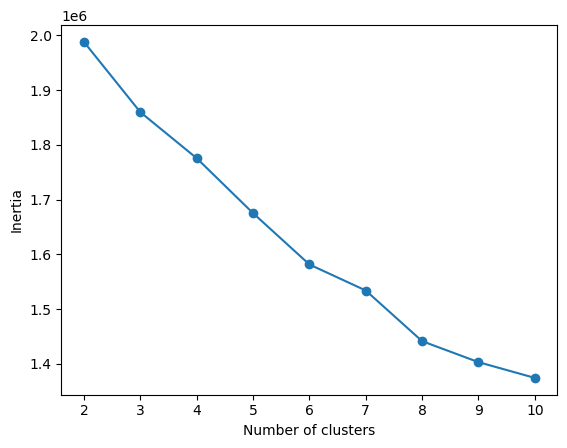

               Age  Flight Distance  Departure Delay in Minutes  \
Cluster                                                           
0        29.912002       694.974212                   15.656502   
1        44.020141      1789.587980                   13.001478   
2        41.227835      1295.509901                   12.681420   
3        39.414239       975.146676                   17.158479   

         Arrival Delay in Minutes  Inflight wifi service  \
Cluster                                                    
0                       16.117636               2.540455   
1                       13.105142               2.036448   
2                       12.813299               4.007296   
3                       17.682126               2.226522   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 2.224089                2.526033   
1                         

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
train['Cluster'] = kmeans.fit_predict(X_train_scaled)

# Cluster analysis
cluster_summary = train.groupby('Cluster')[features].mean()
print(cluster_summary)


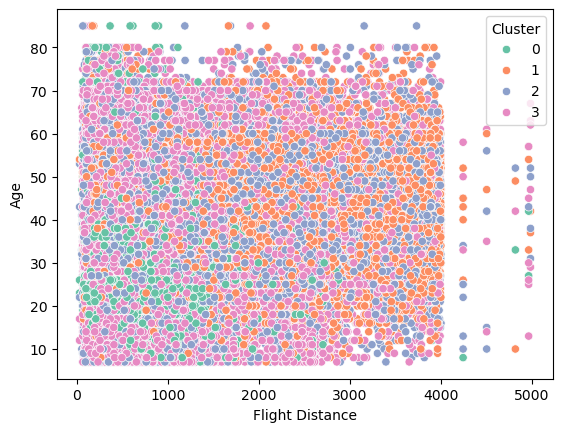

In [23]:
#visualize clusters
sns.scatterplot(x='Flight Distance', y='Age', hue='Cluster', data=train, palette='Set2')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9638897443794272
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf is your trained RandomForestClassifier
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)


                              feature  importance
9                     Online boarding    0.167228
4               Inflight wifi service    0.152791
21                              Class    0.109979
20                     Type of Travel    0.093843
11             Inflight entertainment    0.055786
10                       Seat comfort    0.044059
1                     Flight Distance    0.037458
13                   Leg room service    0.037387
19                      Customer Type    0.035908
6              Ease of Online booking    0.034490
0                                 Age    0.032667
12                   On-board service    0.030831
14                   Baggage handling    0.027784
15                    Checkin service    0.024355
17                        Cleanliness    0.022349
16                   Inflight service    0.020028
7                       Gate location    0.016793
5   Departure/Arrival time convenient    0.016743
3            Arrival Delay in Minutes    0.012190


/var/folders/cr/djdcbymj15q1ck2084myh9h00000gn/T/ipykernel_14483/1759146022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


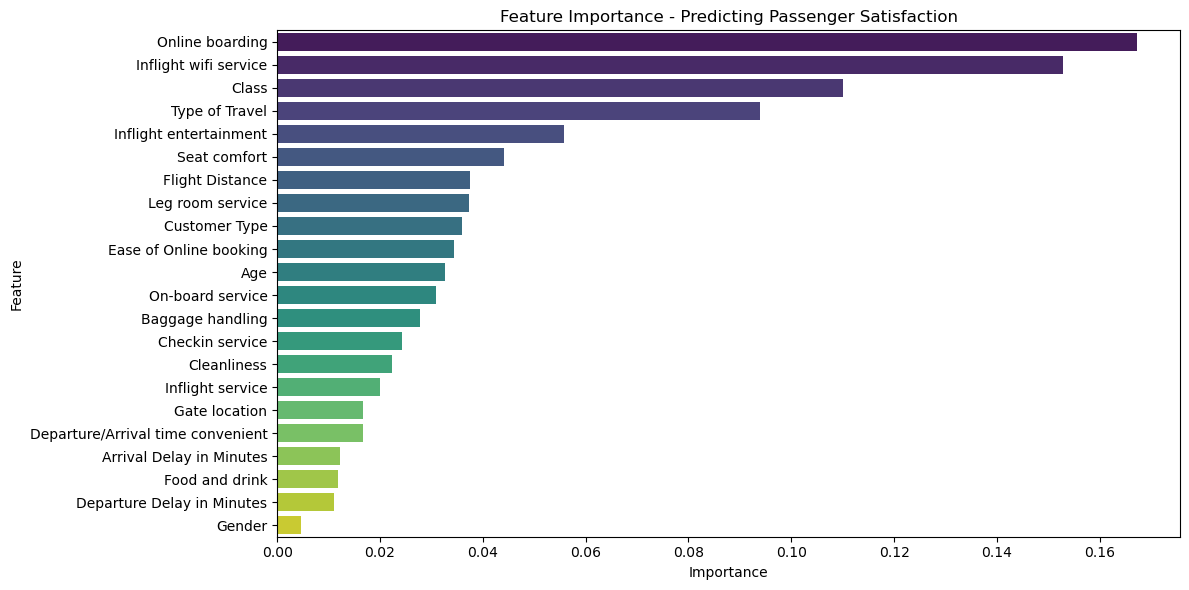

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance - Predicting Passenger Satisfaction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
